# Linear Modeling - Categorical

We previously explored how a linear relationship can be defined between quantitative measures. However, the linear equation is not limited to continuous measures and it can be used to model categorical variables by setting $x$ to 0 or 1 for the categorical covariate of interest

![lm_categorical.png](images/lm_categorical.png)

We will explore how we can model for categorical covariates
- for 2 categories e.g male/female
- for > 2 categories e.g. BMI category (underweight, normal, overweight, obese)

---
## Data preparation

We will use the dataset from the Framingham study, which was a long term study of cardiovascular disease about subjsects in Framingham, USA. In this dataset ~4000 subjects were followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

Variables include:
- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

We will build a model with `sysBP` as a response and explore its relationship with other variable(s). In this case, we will filter out cases that are on antihypertensive medication `BPMeds == 0`

In [1]:
library(tidyverse)

# load data
data<- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# rename and change data types
data <- data %>%
        rename(sex = male) %>%
        mutate(sex = as.factor(sex)) %>%
        mutate(education = as.factor(education)) %>%
        mutate(currentSmoker = as.factor(currentSmoker)) %>%
        mutate(BPMeds = as.factor(BPMeds)) %>%
        mutate(prevalentStroke = as.factor(prevalentStroke)) %>%
        mutate(prevalentHyp = as.factor(prevalentHyp)) %>%
        mutate(diabetes = as.factor(diabetes)) %>%
        mutate(TenYearCHD = as.factor(TenYearCHD))

# filter out cases with BPMeds and drop missing values
data <- data %>%
        filter(BPMeds==0) %>%
        drop_na  

head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 4240 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


We will look at the possible relationships between `sysBP` and covariates `BMI`, `age` and include a categorical covariate `sex`. We can first explore the data by doing pairwise plots using the `ggpairs` function from the `GGally` library

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


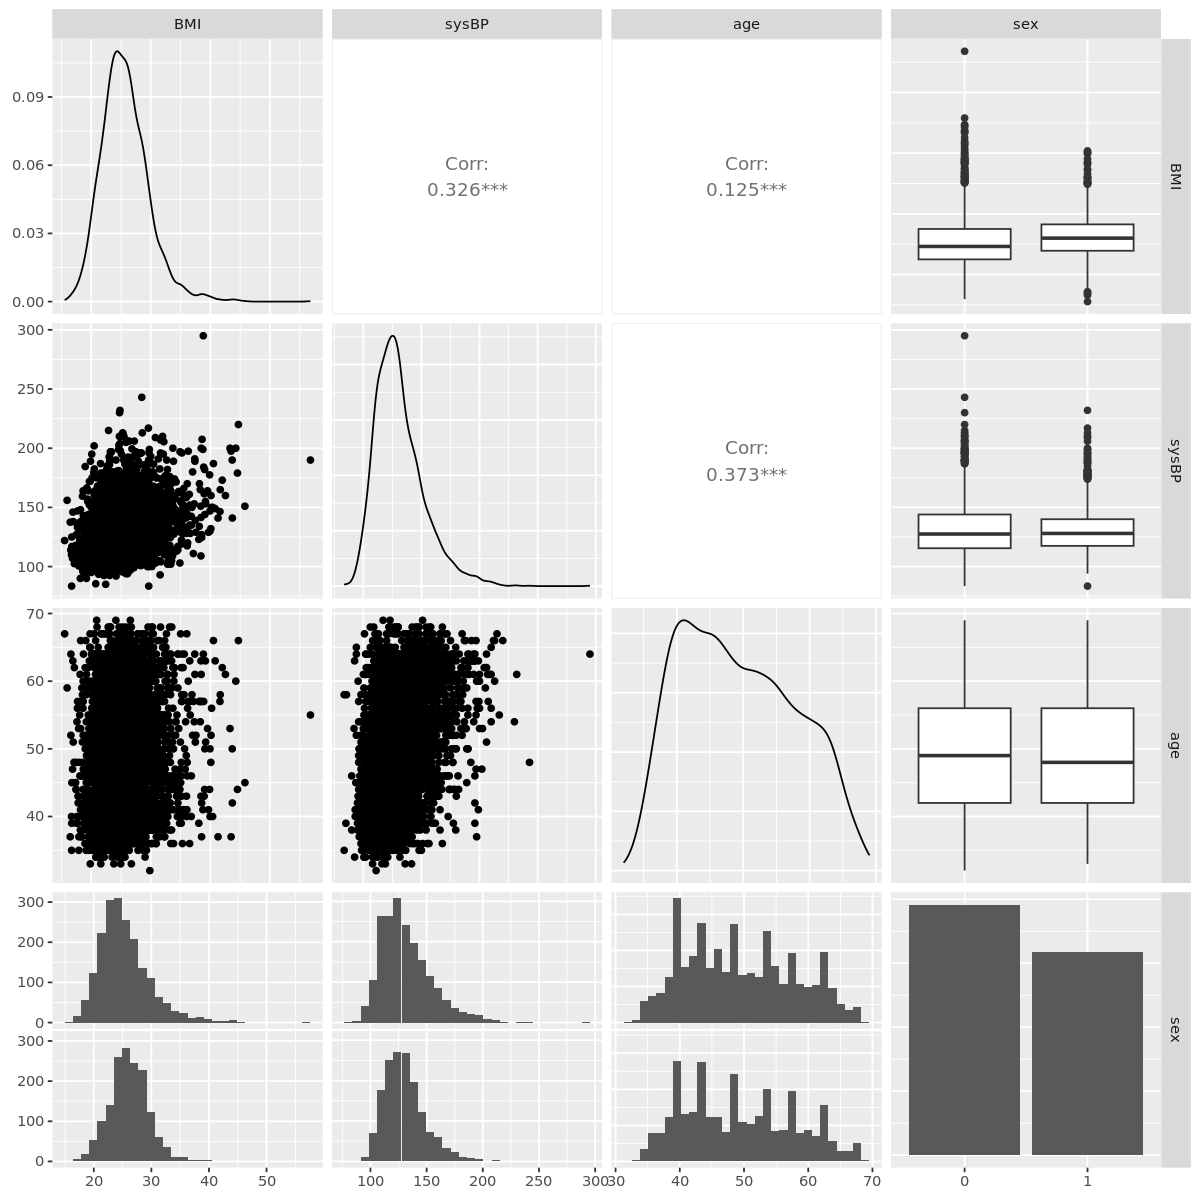

In [2]:
library(GGally)

# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=10)

data %>% select(BMI, sysBP, age, sex) %>%
         ggpairs

For the pairwise plot, we can see that there is a possible relation between `sysBP` and the the categorical covariate `sex` and we could include it in our linear model

---
## Modeling a categorical covariate

We previously defined a linear model with `BMI` and `age` as covariates

$$
y = b_0 + b_1 x_1 + b_2 x_2
$$

$$
\begin{align}
\text{where } b_0 &= \text{intercept}\\
b_1 &= \text{BMI coefficient}\\
b_2 &= \text{age coefficient}\\
\end{align}
$$

We now add the `sex` categorical covariate

$$
y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3
$$

$$
\begin{align}
\text{where } b_0 &= \text{intercept}\\
b_1 &= \text{BMI coefficient}\\
b_2 &= \text{age coefficient}\\
b_3 &= \text{sex coefficient}
\end{align}
$$

Let us consider $x_{3}$ as a categorical variable (sex) and we can indicate the 2 categories

$$
\begin{align}
x_{3} &= 0\quad \text{for sex }=0 \quad \text{(reference)}\\
x_{3} &= 1\quad \text{for sex }=1
\end{align}
$$

For the 2 categories, we have the following equations

- When the category `sex  = 0` (reference), the intercept is $b_0$

$$y = b_0 + b_1 x_1 + b_2 x_2$$

- When the category `sex = 1`, the intercept $b_0$ will be offset by $b_3$

$$
\begin{align}
y &= b_0 + b_1 x_1 + b_2 x_2 + b_3\\ 
&= (b_0 + b_3) + b_1 x_1 + b_2 x_2
\end{align}
$$



We will use the `ggPredict` function from the `ggigraphExtra` library to illustrate this. 
- We will first fit a linear model using the `lm` function and include the `sex` covariate with the `BMI` and `age` covariates
- The `lm` output will be used by the `ggPredict` function to create the plots

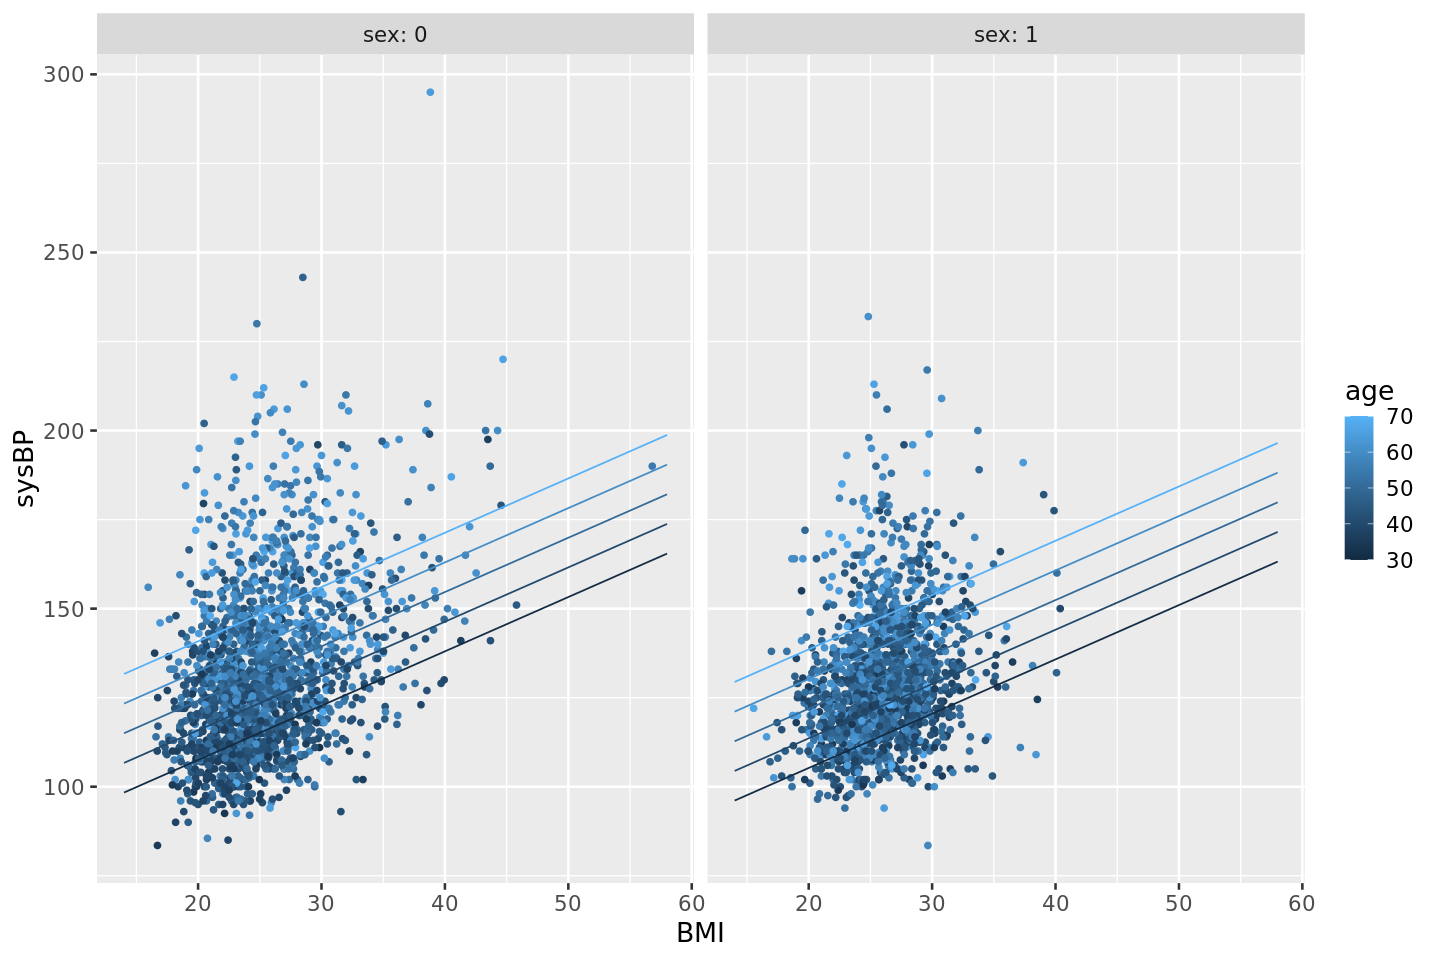

In [3]:
fit_BMI_age_sex <- lm(sysBP ~ BMI + age + sex, data)

# adjust size of the image output
options(repr.plot.width=12, repr.plot.height=8)

ggiraphExtra::ggPredict(fit_BMI_age_sex) + theme_grey(base_size=16)

We can see that when the category `sex = 1` the intercept is offset by a fixed amount relative to the reference `sex = 0`, which is the coefficient for this category

### Solving for categorical covariates in the linear model using matrices

As an example, let us consider $x_{1}$ as a categorical variable and we can indicate the 2 categories

$$
\begin{align}
x_{1} &= 0\quad \text{for category }=0 \quad \text{(reference)}\\
x_{1} &= 1\quad \text{for category }=1
\end{align}
$$

This can be expressed in a matrix form, where the $x_{1 1} \dots x_{n 1}$ column is coded as `1` or `0` depending on the category of observation $n$

$$\left[\begin{array}{l}y_{1} \\ y_{2} \\ y_{n}\end{array}\right]=\left[\begin{array}{cccc}1 & x_{11} & x_{12} & \ldots & x_{1 k} \\ 1 & x_{21} & x_{22} & \ldots & x_{2 k} \\ 1 & x_{n 1} & x_{n 2} & \ldots & x_{n k}\end{array}\right]\left[\begin{array}{c}\beta_{0} \\ \beta_{1} \\ \beta_{2} \\ \beta_{k}\end{array}\right]+\left[\begin{array}{c}e_{1} \\ e_{2} \\ e_{n}\end{array}\right]$$

More compactly, it can be expressed as

$$Y=X \beta+e$$

We can obtain the beta coefficients via the following matrix operation that finds the minimum $SS$

$$\hat{\beta}=\left(X^{T} X\right)^{-1} X^{T} Y$$

We use the `lm` function for fit the linear model with the covariates of interest `BMI`, `age`, and `sex`

In [4]:
fit_BMI_age_sex <- lm(sysBP ~ BMI + age + sex, data)

We can take a look at the matrix showing the categorical coding per observation of the dataset using the `model.matrix` function

In [5]:
model.matrix(fit_BMI_age_sex) %>% head

,(Intercept),BMI,age,sex1
1,1,26.97,39,1
2,1,28.73,46,0
3,1,25.34,48,1
4,1,28.58,61,0
5,1,23.10,46,0
6,1,30.30,43,0


We can get the estimates of the coefficients

In [6]:
fit_BMI_age_sex %>% broom::tidy() %>% # tidy output
                    select(term, estimate)  

term,estimate
<chr>,<dbl>
(Intercept),52.0377969
BMI,1.5247853
age,0.8325703
sex1,-2.2530527


The outcome/response (`sysBP`) is related to the covariates via a linear equation

$$
y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3
$$

$$
\begin{align}
\text{where } b_0 &= \text{intercept}\\
b_1 &= \text{BMI coefficient}\\
b_2 &= \text{age coefficient}\\
b_3 &= \text{sex coefficient}
\end{align}
$$

Here, we see an additional categorical coefficient `sex1` which indicates the offset to the intercept when the `sex category = 1`

- When `sex category = 0`

$$
\begin{align}
\text{sysBP} &= 52.04_\text{intercept} + 1.52_\text{BMI} \times \text{BMI} + 0.83_\text{age} \times \text{age} + -2.25_\text{sex} \times 0\\
&= 52.04_\text{intercept} + 1.52_\text{BMI} \times \text{BMI} + 0.83_\text{age} \times \text{age} 
\end{align}
$$

- When `sex category = 1`

$$
\begin{align}
\text{sysBP} &= 52.04_\text{intercept} + 1.52_\text{BMI} \times \text{BMI} + 0.83_\text{age} \times \text{age} + -2.25_\text{sex} \times 1\\
&= 52.04_\text{intercept} + 1.52_\text{BMI} \times \text{BMI} + 0.83_\text{age} \times \text{age} - 2.25\\
&= 49.79_\text{intercept} + 1.52_\text{BMI} \times \text{BMI} + 0.83_\text{age} \times \text{age}
\end{align}$$

As we saw in the previous graph, the category `sex = 1` decreases the intercept $b_0$ by the coefficient $b_3$ 

---
## Analytical approach

### Significance testing of coefficients

#### 1. Calculate the test statistic

We will calculate the t-statistic for the coefficients and use them to find the p-values from the null t-distribution

$$t_{b_0} = \frac{b_0}{\operatorname{SE}(b_{0})}$$
$$t_{b_1} = \frac{b_1}{\operatorname{SE}(b_{1})}$$

Recall that

$$y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{k} x_{i k}+e_{i}\quad$$ 

$$\text{for}\ i =\text{sample},k =\text{independent variable}$$

The linear equations can be expressed in a matrix form

$$Y=X \beta+\epsilon$$

We would like to find the standard error of the different coefficients, which are based on the variance of the error term $\epsilon$

$$\epsilon=Y-X \beta$$

$$s^2=1/(n-k)\cdot\epsilon^{T}\epsilon$$

$$
\begin{align}
\text{where }n &= \text{number of samples}\\
k &= \text{number of parameters}
\end{align}
$$

We can then obtain the standard errors for the coefficients

$$\operatorname{SE}(b_0)=s^2\left(X^{T} X\right)_{11}^{-1}\quad \text{for intercept}$$

$$\operatorname{SE}(b_k)=s^2\left(X^{T} X\right)_{kk}^{-1}\quad \text{for variable}\ k$$

Finally, we obtain the t-statistic for the coefficients

$$t_{b_0} = \frac{b_0}{\operatorname{SE}(b_0)}$$
$$t_{b_k} = \frac{b_k}{\operatorname{SE}(b_k)}$$

We can obtain the t-statistics for the intercept, BMI, age, sex (cat=1)

In [7]:
fit_BMI_age_sex <- lm(sysBP ~ BMI + age + sex, data) %>% summary

t_b0 <- fit_BMI_age_sex$coefficients[1,3] # intercept
t_b1 <- fit_BMI_age_sex$coefficients[2,3] # BMI
t_b2 <- fit_BMI_age_sex$coefficients[3,3] # age
t_b3 <- fit_BMI_age_sex$coefficients[4,3] # sex1

tibble(term=c("intercept","BMI","age","sex [cat=1]"),
       t_stat=c(t_b0,t_b1,t_b2,t_b3))

term,t_stat
<chr>,<dbl>
intercept,20.194413
BMI,19.266735
age,22.468203
sex [cat=1],-3.567421


#### 2. Use the theoretical null distribution to calculate the p-value

The null t distribution is parameterized by the degrees of freedom `df`

- `df` = number of samples - number of parameters

In [8]:
n <- nrow(data)
num_parameters <- 4 # b0, b1, b2, b3

df <- n - num_parameters

df

[1] 3543

We use the `vdist_t_prob` function from the `vistributions` library to plot the t-distribution parameterized by `df` and t-statistic for the intercept, BMI, age and sex (cat = 1)

- intercept

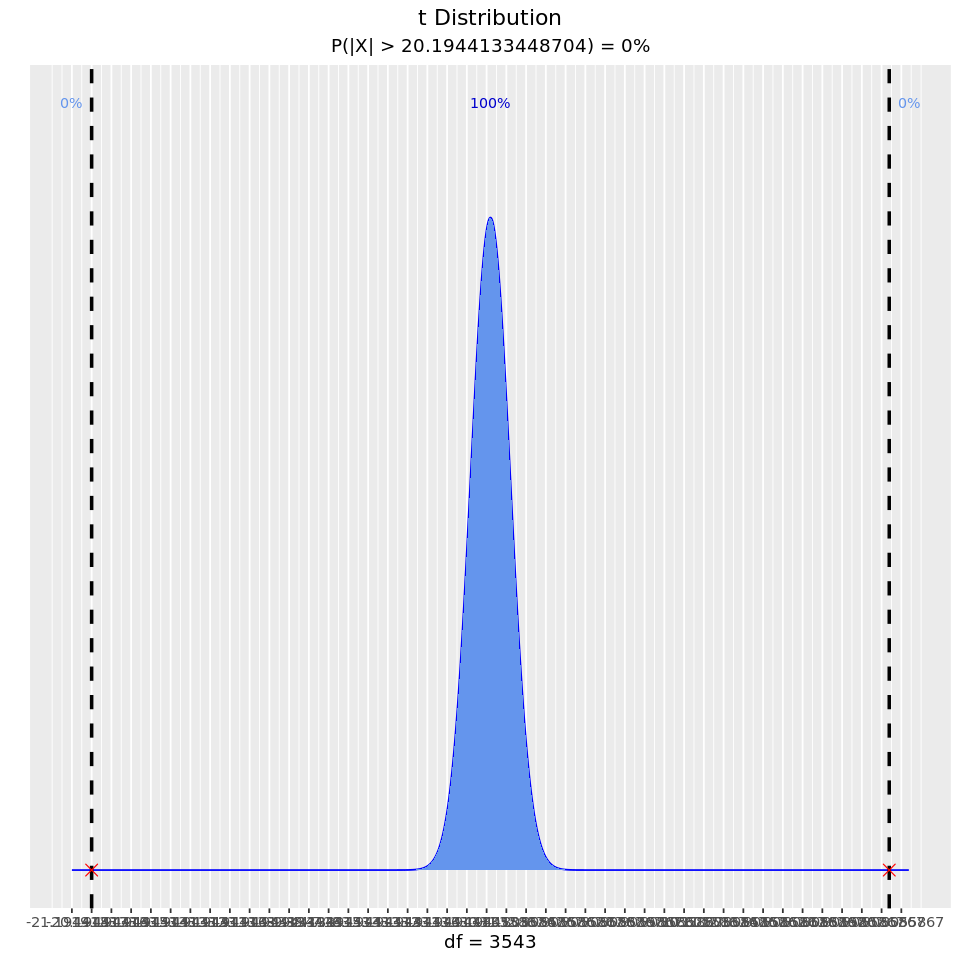

In [9]:
library(vistributions)

# adjust size of the image output
options(repr.plot.width=8, repr.plot.height=8)

vdist_t_prob(perc = t_b0, df = df, type="both")

- BMI

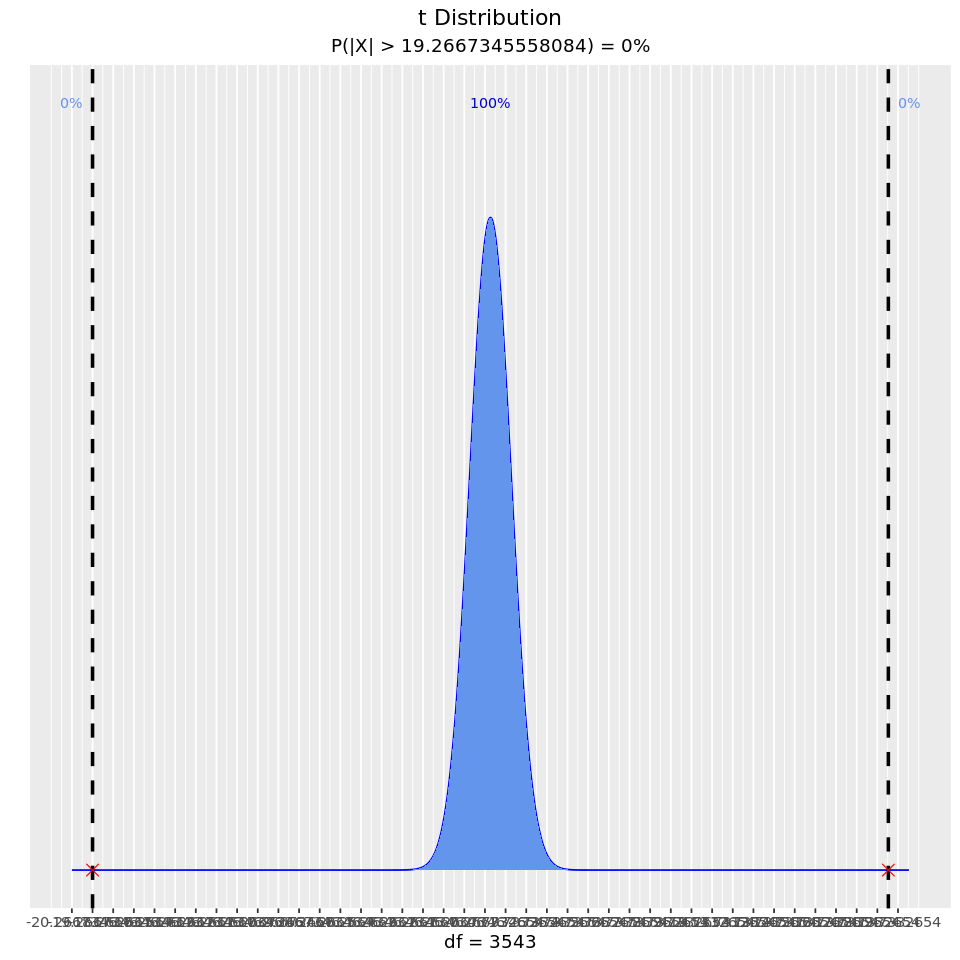

In [10]:
vdist_t_prob(perc = t_b1, df = df, type="both")

- age

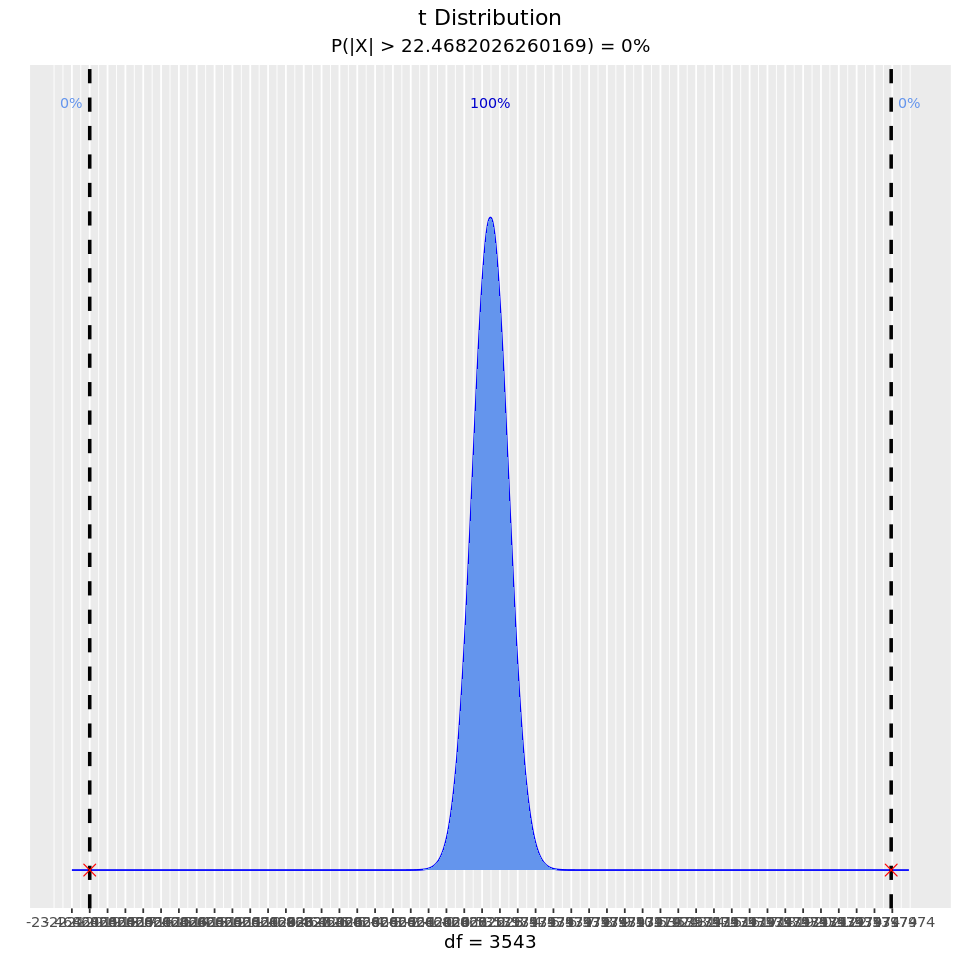

In [11]:
vdist_t_prob(perc = t_b2, df = df, type="both")

- sex

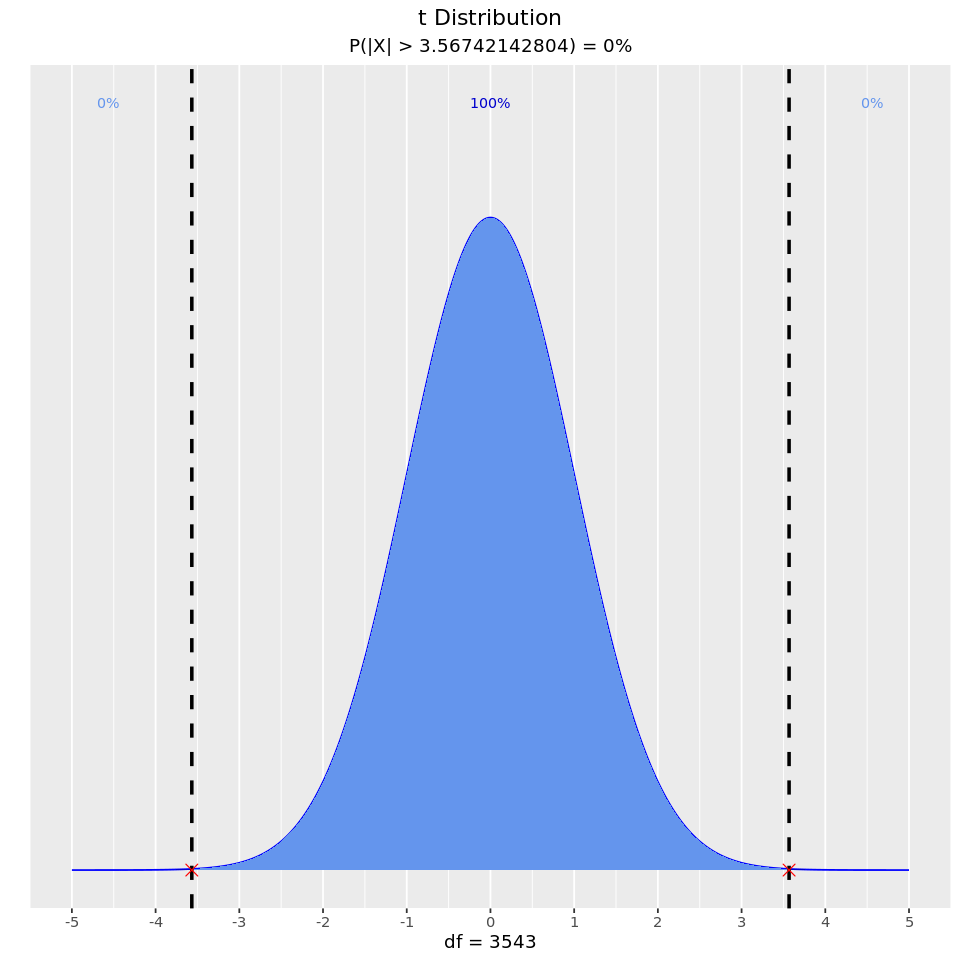

In [12]:
vdist_t_prob(perc = t_b3, df = df, type="both")

### Confidence interval of coefficients

Recall that the 95% confidence interval is defined as

$$\bar{x}-t_\mathit{lower}\times{SE} \leq \mu \leq \bar{x}+t_\mathit{upper}\times{SE}$$

$$
\begin{align}
\text{where } \mu &= \text{population mean of coefficient}\\
\bar{x} &= \text{sample mean of coefficient}\\
SE &= \text{standard error } \frac{s}{\sqrt{n}}\\
t_\mathit{lower} &= 2.5 \text{ percentile t-score}\\
t_\mathit{upper} &= 97.5 \text{ percentile t-score}
\end{align}
$$

The lower and upper t-scores are obtained using the `qt` function

In [13]:
lower_t_score <- qt(0.025, df = df)
upper_t_score <- qt(0.975, df = df)

tibble(percentile=c("0.025","0.975"),
       t_score=c(lower_t_score,upper_t_score))

percentile,t_score
<chr>,<dbl>
0.025,-1.960634
0.975,1.960634


We obtain the coefficient values and their standard errors from the `lm` object

In [14]:
b0 <- fit_BMI_age_sex$coefficients[1,1] # intercept
b1 <- fit_BMI_age_sex$coefficients[2,1] # BMI
b2 <- fit_BMI_age_sex$coefficients[3,1] # age
b3 <- fit_BMI_age_sex$coefficients[4,1] # sex1

se_b0 <- fit_BMI_age_sex$coefficients[1,2] # intercept
se_b1 <- fit_BMI_age_sex$coefficients[2,2] # BMI
se_b2 <- fit_BMI_age_sex$coefficients[3,2] # age
se_b3 <- fit_BMI_age_sex$coefficients[4,2] # sex1

tibble(term=c("intercept","BMI","age","sex [cat=1]`"),
       coefficient=c(b0,b1,b2,b3),
       std_err=c(se_b0,se_b1,se_b2,se_b3))

term,coefficient,std_err
<chr>,<dbl>,<dbl>
intercept,52.0377969,2.57684123
BMI,1.5247853,0.07914083
age,0.8325703,0.03705549
sex [cat=1]`,-2.2530527,0.63156336


**intercept**
- `lower`: intercept + t_score(0.025) x std error of intercept
- `upper`: intercept + t_score(0.975) x std error of intercept

In [15]:
# 95% CI for b0

b0 + lower_t_score * se_b0
b0 + upper_t_score * se_b0

[1] 46.98555

[1] 57.09004

**BMI**
- `lower`: BMI + t_score(0.025) x std error of BMI
- `upper`: BMI + t_score(0.975) x std error of BMI

In [16]:
# 95% CI for b1

b1 + lower_t_score * se_b1
b1 + upper_t_score * se_b1

[1] 1.369619

[1] 1.679951

**age**
- `lower`: age + t_score(0.025) x std error of age
- `upper`: age + t_score(0.975) x std error of age

In [17]:
# 95% CI for b2

b2 + lower_t_score * se_b2
b2 + upper_t_score * se_b2

[1] 0.759918

[1] 0.9052225

**sex (cat = 1)**
- `lower`: sex (cat = 1) + t_score(0.025) x std error of sex (cat = 1)
- `upper`: sex (cat = 1) + t_score(0.975) x std error of sex (cat = 1)

In [18]:
# 95% CI for b3

b3 + lower_t_score * se_b3
b3 + upper_t_score * se_b3

[1] -3.491317

[1] -1.014788

## Using library functions

We use the `lm` function to obtain the estimates and the _p-values_

In [19]:
fit_BMI_age_sex <- lm(sysBP ~ BMI + age + sex, data)

fit_BMI_age_sex %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),52.0377969,2.57684123,20.194413,6.308504e-86
BMI,1.5247853,0.07914083,19.266735,9.551858e-79
age,0.8325703,0.03705549,22.468203,1.250377e-104
sex1,-2.2530527,0.63156336,-3.567421,3.652840e-04


To get the confidence intervals of the coefficients, we use the `confint` function on the `lm` object

In [20]:
confint(fit_BMI_age_sex)

,2.5 %,97.5 %
(Intercept),46.985555,57.0900389
BMI,1.369619,1.6799515
age,0.759918,0.9052225
sex1,-3.491317,-1.0147882


---
## How well does the model explain the data?

We can assess how well the model fits the data by looking at
- goodness of fit measures:  $R^2$ and adjusted $R^2$
- diagnostic plots of the residuals after fitting

### 1. $R^2$ and adjusted $R^2$

We can estimate the goodness of fit of the model to the data by looking at the $R^2$ and adjusted $R^2$

In [21]:
summary(fit_BMI_age_sex)$r.squared
summary(fit_BMI_age_sex)$adj.r.squared

[1] 0.2211815

[1] 0.220522

We can see that the $R^2$ has increased compared to the previous model fit (BMI and age), indicating that the additional categorical covariate (sex) improved the fit to the data

In [22]:
fit_BMI_age <- data %>% lm(sysBP ~ BMI + age, .)

summary(fit_BMI_age)$r.squared
summary(fit_BMI_age)$adj.r.squared

[1] 0.2183839

[1] 0.2179428

### 2. Diagnostic plot of residuals

We can look at the plot of residuals

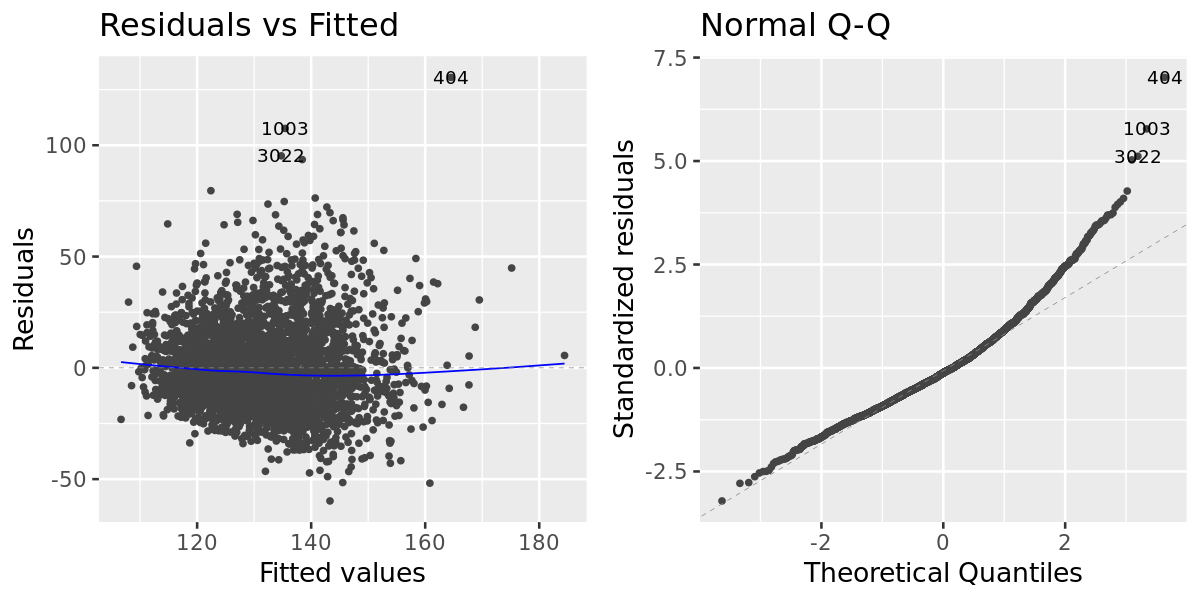

In [23]:
library(ggfortify)

# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=5)

autoplot(fit_BMI_age_sex, which = 1:2) + theme_grey(base_size=16)

Most residuals are centered around 0 and the QQ plot shows that that the residuals are closer to a normal distribution except for the higher values and outliers

We can compare this to the previous fit with BMI and age as the covariates

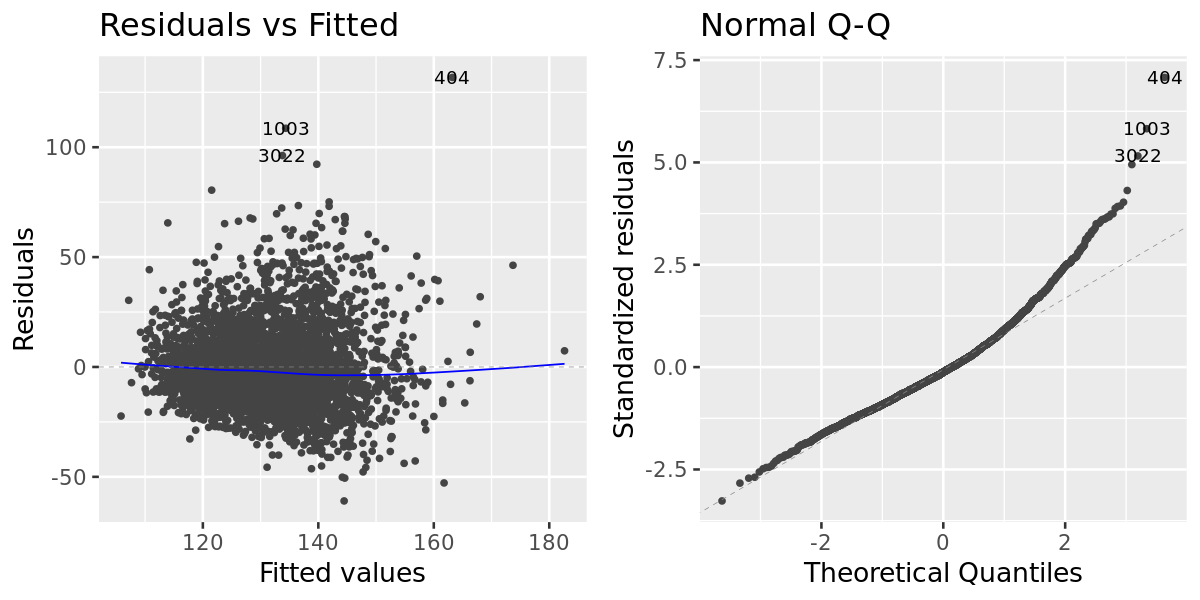

In [24]:
# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=5)

autoplot(fit_BMI_age, which = 1:2) + theme_grey(base_size=16)

---
## What about covariates with > 2 categories?

For covariates with > 2 categories, they can be recoded as a combination of covariates with 2 categories

Let us consider an example where BMI is recoded into the following categories
- <18.5 `underweight`
- 18.5 - 24.9 `healthy`
- 25 - 29.9 `overweight`
- \>=30 `obese`

In [25]:
data_bmi_category <- data %>%
                     select(sysBP, BMI) %>%
                     mutate(BMI_cat = case_when(
                                       BMI < 18.5 ~ "underweight",
                                       BMI >= 18.5 & BMI <25 ~ "healthy",
                                       BMI >=25 & BMI <30 ~ "overweight",
                                       BMI >=30 ~ "obese"
                     )) %>%
                     mutate(BMI_cat = as.factor(BMI_cat))

head(data_bmi_category)

sysBP,BMI,BMI_cat
<dbl>,<dbl>,<fct>
106.0,26.97,overweight
121.0,28.73,overweight
127.5,25.34,overweight
150.0,28.58,overweight
130.0,23.10,healthy
180.0,30.30,obese


The 4 categories in the `BMI_cat` covariate can be split into $4 - 1$ covariates, and one category is chosen as the reference $b_0$ (e.g. `healthy`)
- $b_1$ underweight
- $b_2$ overweight
- $b_3$ obese

Consider the linear equation for the different categories for `BMI_cat`

$$
y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3
$$

$$
\begin{align}
\text{where } b_0 &= \text{intercept (reference)}\\
b_1 &= \text{BMI underweight}\\
b_2 &= \text{BMI overweight}\\
b_3 &= \text{BMI obese}
\end{align}
$$

Depending of the categories in `BMI_cat`, we have the following linear equations

$$y = b_0 \text{ for healthy (reference) when } x_1, x_2, x_3 = 0$$

$$y = b_0 + b_1 x_1 \text{ for underweight when } x_2, x_3 = 0$$

$$y = b_0 + b_2 x_2 \text{ for overweight when } x_1, x_3 = 0$$

$$y = b_0 + b_3 x_3 \text{ for obese when } x_1, x_2 = 0$$

In matrix notation, we have the different columns coded `0` or `1` depending on the `BMI_cat` category per observation
- $x_{1 1} \dots x_{n 1}$ column for `underweight` category
- $x_{1 2} \dots x_{n 2}$ column for `overweight` category
- $x_{1 3} \dots x_{n 3}$ column for `obese` category

$$\left[\begin{array}{l}y_{1} \\ y_{2} \\ y_{n}\end{array}\right]=\left[\begin{array}{cccc}1 & x_{11} & x_{12} & x_{13} \\ 1 & x_{21} & x_{22} & x_{23} \\ 1 & x_{n 1} & x_{n 2} &  x_{n 3}\end{array}\right]\left[\begin{array}{c}\beta_{0} \\ \beta_{1} \\ \beta_{2} \\ \beta_{3}\end{array}\right]+\left[\begin{array}{c}e_{1} \\ e_{2} \\ e_{n}\end{array}\right]$$

We use the `lm` function for fit the linear model with the `BMI_cat` covariate

In [26]:
fit_bmi_cat <- lm(sysBP ~ BMI_cat, data_bmi_category)

We can take a look at the matrix showing the categorical coding per observation of the dataset using the `model.matrix` function

In [27]:
model.matrix(fit_bmi_cat) %>% head

,(Intercept),BMI_catobese,BMI_catoverweight,BMI_catunderweight
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0
5,1,0,0,0
6,1,1,0,0


We can get the estimates of the coefficients

In [28]:
fit_bmi_cat %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),125.777429,0.5058826,248.629662,0.000000e+00
BMI_catobese,17.720212,1.1039134,16.052176,4.991075e-56
BMI_catoverweight,8.423584,0.7291913,11.551954,2.504393e-30
BMI_catunderweight,-7.360763,2.9597017,-2.486995,1.292842e-02


We can see that the `sysBP` reference for `healthy` BMI is 125.78
- In the `obese` category, the `sysBP` baseline increases by 17.72
- In the `overweight` category, the `sysBP` baseline increases by 8.42
- In the `underweight` category, the `sysBP` baseline decreases by 7.36

---
# Application: Statistical table and plotting

We will be using these libraries for making statistical tables  and plots for the linear models
- `stargazer`: statistical tables for models
- `ggstatsplot`: plotting of the model coefficients
- `ggfortify`: diagnostic plots for models

To illustrate how we use them, we will build several models looking at the relationship between `sysBP` and `BMI`/`age`/`sex` variables in the Framingham dataset

In [29]:
library(tidyverse)

# load data
data<- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# rename and change data types
data <- data %>%
        rename(sex = male) %>%
        mutate(sex = as.factor(sex)) %>%
        mutate(education = as.factor(education)) %>%
        mutate(currentSmoker = as.factor(currentSmoker)) %>%
        mutate(BPMeds = as.factor(BPMeds)) %>%
        mutate(prevalentStroke = as.factor(prevalentStroke)) %>%
        mutate(prevalentHyp = as.factor(prevalentHyp)) %>%
        mutate(diabetes = as.factor(diabetes)) %>%
        mutate(TenYearCHD = as.factor(TenYearCHD))

# filter out cases with BPMeds and drop missing values
data <- data %>%
        filter(BPMeds==0) %>%
        drop_na  

head(data)

Rows: 4240 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


## 1. Statistical table

We will use the `stargazer` function from the `stargazer` library to generate a statistical table from the model. The function can take one or more models as its input and we can specify the following options
- `ci`: set to TRUE to print the confidence intervals
- `type`: set to HTML to print the table in the notebook

We will define a local function `print_html` to print the HTML output from `stargazer` in the notebook

In [30]:
# print table convenience function

print_html <- function(input) {
    
    capture.output(input) %>% 
    paste(collapse="") %>%
    IRdisplay::display_html()
    
}

We will fit several models and print them using `stargazer`

In [31]:
fit_BMI <- lm(sysBP ~ BMI, data)
fit_age <- lm(sysBP ~ age, data)
fit_sex <- lm(sysBP ~ sex, data)
fit_BMI_age <- lm(sysBP ~ BMI + age, data)
fit_BMI_sex <- lm(sysBP ~ BMI + sex, data)
fit_age_sex <- lm(sysBP ~ age + sex, data)
fit_BMI_age_sex <- lm(sysBP ~ BMI + age + sex, data)

# print stargazer table

library(stargazer)

stargazer(fit_BMI, 
          fit_age, 
          fit_sex, 
          fit_BMI_age, 
          fit_BMI_sex, 
          fit_age_sex, 
          fit_BMI_age_sex, ci=TRUE, type="html") %>% print_html



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




Dependent variable: sysBP (1) (2) (3) (4) (5) (6) (7) BMI 1.721 *** 1.499 *** 1.750 *** 1.525 *** (1.557, 1.885) (1.344, 1.654) (1.585, 1.914) (1.370, 1.680) age 0.924 *** 0.836 *** 0.923 *** 0.833 *** (0.848, 0.999) (0.763, 0.909) (0.847, 0.999) (0.760, 0.905) sex1 -1.353 * -2.601 *** -1.145 * -2.253 *** (-2.748, 0.043) (-3.923, -1.278) (-2.441, 0.150) (-3.491, -1.015) Constant 87.068 *** 85.725 *** 131.917 *** 51.529 *** 87.497 *** 86.282 *** 52.038 *** (82.799, 91.338) (81.933, 89.517) (130.983, 132.852) (46.478, 56.580) (83.230, 91.764) (82.439, 90.125) (46.987, 57.088) Observations 3,547 3,547 3,547 3,547 3,547 3,547 3,547 R 2 0.106 0.139 0.001 0.218 0.110 0.140 0.221 Adjusted R 2 0.106 0.139 0.001 0.218 0.110 0.139 0.221 Residual Std. Error 19.946 (df = 3545) 19.581 (df = 3545) 21.090 (df = 3545) 18.657 (df = 3544) 19.907 (df = 3544) 19.575 (df = 3544) 18.627 (df = 3543) F Statistic 422.468 *** (df = 1; 3545) 571.608 *** (df = 1; 3545) 3.609 * (df = 1; 3545) 495.098 *** (df = 2; 3544) 219.487 *** (df = 2; 3544) 287.467 *** (df = 2; 3544) 335.399 *** (df = 3; 3543) Note: * p<0.1; ** p<0.05; *** p<0.01

## 2. Statistical plot

We will use the `ggcoefstats` function from `ggstatsplot` to generate a plot of the coefficients with the confidence intervals and the associate p-values. We can specify the following options
- `exclude.intercept`: set to TRUE to omit the intercept
- `stats.label.args`: provide a list of options for the labels if desired

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



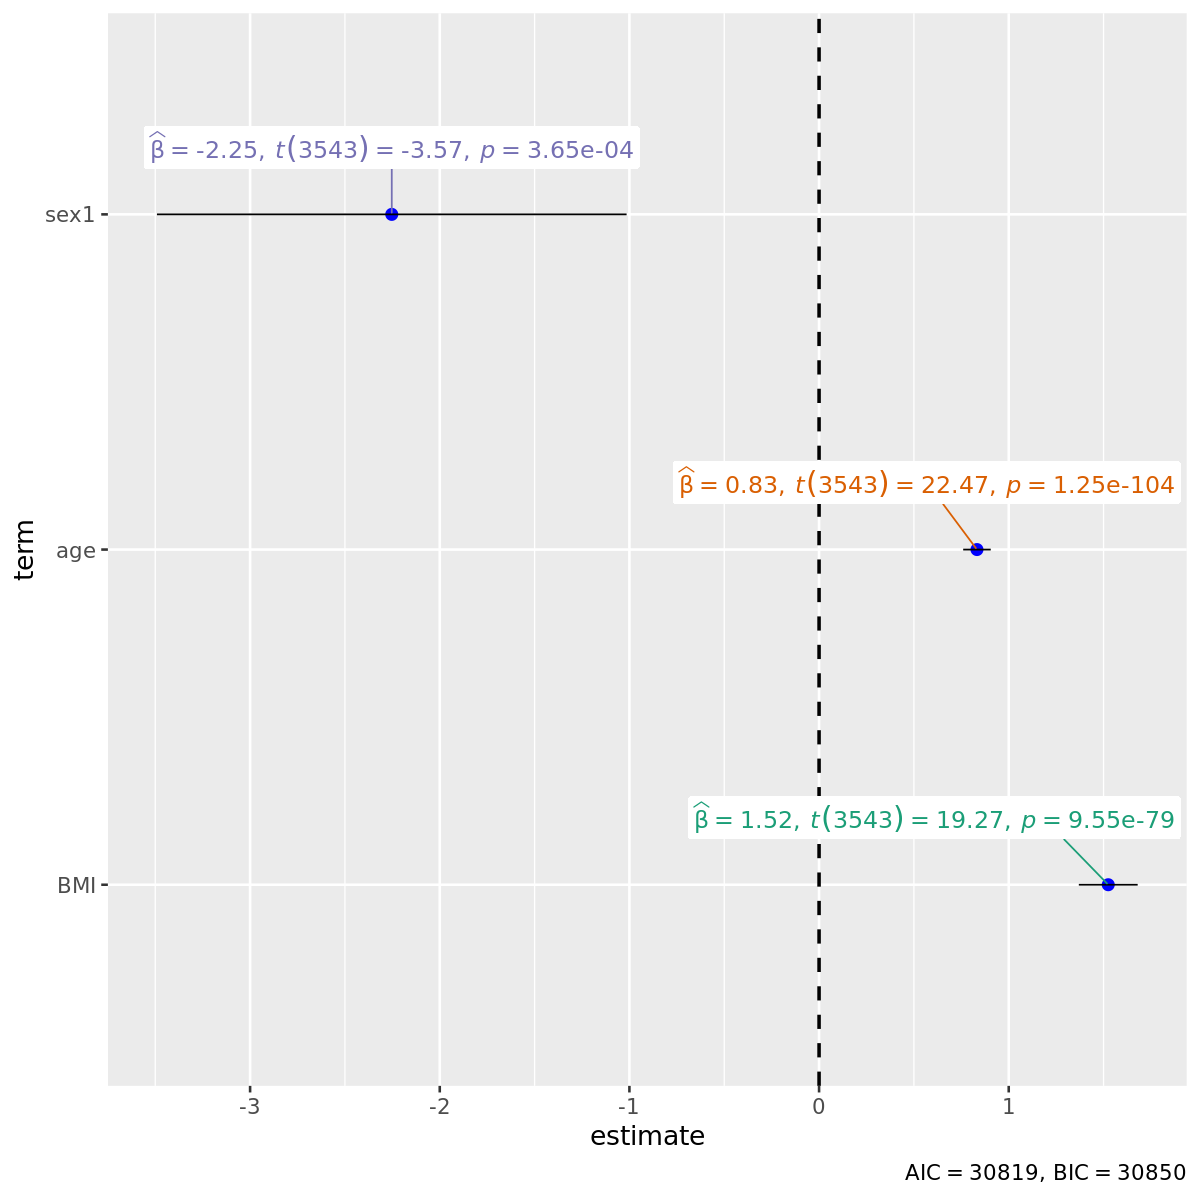

In [32]:
library(ggstatsplot)

# adjust size of the image output
options(repr.plot.width=10, repr.plot.height=10)

fit_BMI_age_sex %>% ggcoefstats(exclude.intercept = T,
                                stats.label.args=list(nudge_y=0.2, 
                                                  size=5, 
                                                  label.size=NA)) +
                      theme_grey(base_size=16)

## 3. Diagnostic plot

We will use the `autoplot` function from the `ggfortify` library to generate basic diagnostic plots of the residuals. For simplicity, we specify the option `which = 1:2` to limit the plots to
- Residuals vs Fitted
- Normal Q-Q

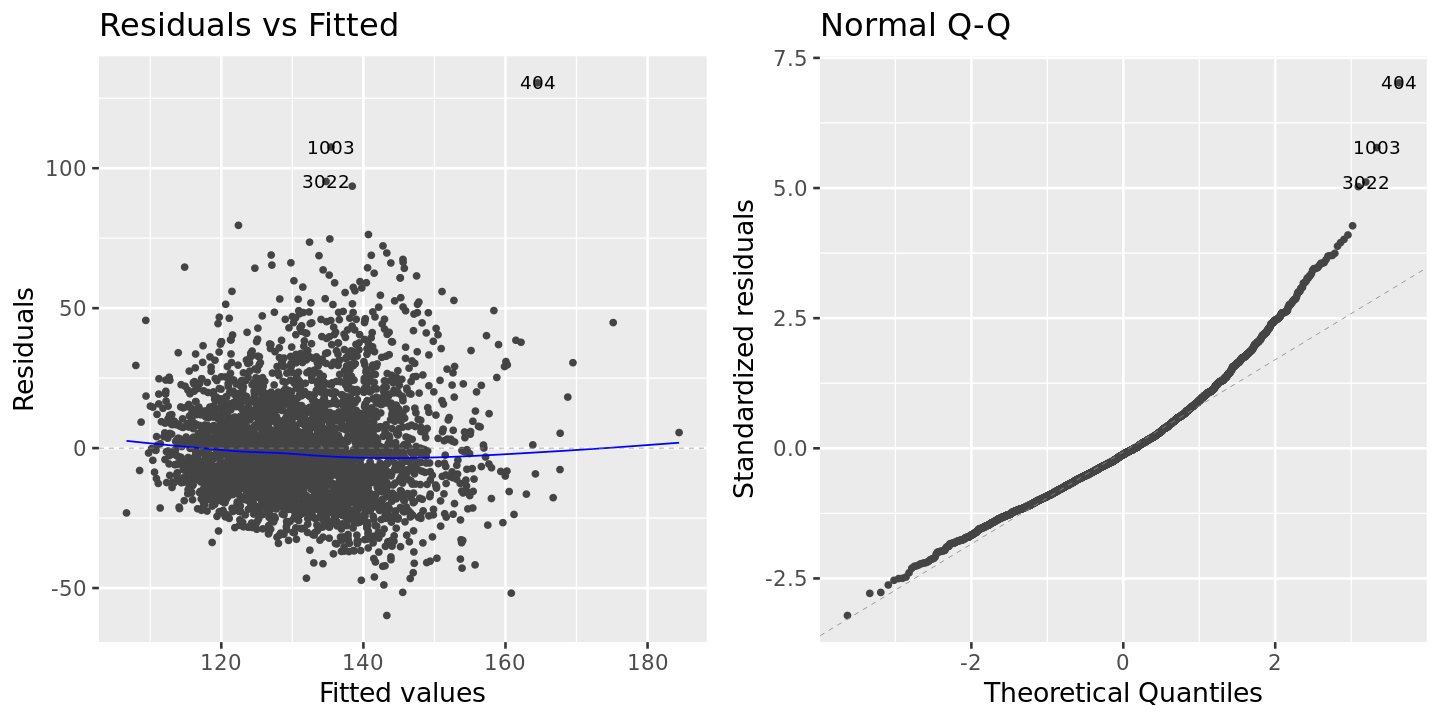

In [33]:
library(ggfortify)

# adjust size of the image output
options(repr.plot.width=12, repr.plot.height=6)

autoplot(fit_BMI_age_sex, which=1:2) + theme_grey(base_size=16)

---
## Exercise - Modeling (Categorical covariates)

For this exercise, we will use the Framingham dataset and model the relationship between `totChol` and 3 covariates `BMI`/`age`/`sex`

In [34]:
library(tidyverse)

# load data
data<- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# rename and change data types
data <- data %>%
        rename(sex = male) %>%
        mutate(sex = as.factor(sex)) %>%
        mutate(education = as.factor(education)) %>%
        mutate(currentSmoker = as.factor(currentSmoker)) %>%
        mutate(BPMeds = as.factor(BPMeds)) %>%
        mutate(prevalentStroke = as.factor(prevalentStroke)) %>%
        mutate(prevalentHyp = as.factor(prevalentHyp)) %>%
        mutate(diabetes = as.factor(diabetes)) %>%
        mutate(TenYearCHD = as.factor(TenYearCHD))

# filter out cases with BPMeds and drop missing values
data <- data %>%
        filter(BPMeds==0) %>%
        drop_na  

head(data)

Rows: 4240 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


We will define a local function `print_html` to print the HTML output from `stargazer` in the notebook

In [35]:
# print html convenience function

print_html <- function(input) {
    
    capture.output(input) %>% 
    paste(collapse="") %>% 
    IRdisplay::display_html()
    
}

### Part 1

Build a linear model using the `lm` function and store it as `myfit_BMI`
- `totChol`: dependent/response variable
- `BMI`: independent/explanatory variable

Build a linear model using the `lm` function and store it as `myfit_BMI_age`
- `totChol`: dependent/response variable
- `BMI`: independent/explanatory variable
- `age`: independent/explanatory variable

Build a linear model using the `lm` function and store it as `myfit_BMI_age_sex`
- `totChol`: dependent/response variable
- `BMI`: independent/explanatory variable
- `age`: independent/explanatory variable
- `sex`: independent/explanatory variable

Create a `stargazer` table that shows 3 models side-by-side
- Explain the coefficients
- Explain which model may be a better fit to the data

In [36]:
library(stargazer)

# start here

In [37]:
# solution

library(stargazer)

myfit_BMI <- lm(totChol ~ BMI, data)
myfit_BMI_age <- lm(totChol ~ BMI + age, data)
myfit_BMI_age_sex <- lm(totChol ~ BMI + age + sex, data)


stargazer(myfit_BMI, 
          myfit_BMI_age, 
          myfit_BMI_age_sex, ci = T, type="html") %>% print_html

Dependent variable: totChol (1) (2) (3) BMI 1.219 *** 0.868 *** 0.933 *** (0.861, 1.577) (0.519, 1.217) (0.583, 1.283) age 1.321 *** 1.313 *** (1.157, 1.485) (1.150, 1.477) sex1 -5.673 *** (-8.464, -2.883) Constant 204.776 *** 148.588 *** 149.869 *** (195.458, 214.093) (137.196, 159.979) (138.484, 161.255) Observations 3,547 3,547 3,547 R 2 0.012 0.077 0.081 Adjusted R 2 0.012 0.077 0.081 Residual Std. Error 43.528 (df = 3545) 42.079 (df = 3544) 41.991 (df = 3543) F Statistic 44.506 *** (df = 1; 3545) 148.477 *** (df = 2; 3544) 104.693 *** (df = 3; 3543) Note: * p<0.1; ** p<0.05; *** p<0.01

### Part 2

Use `ggcoefstats` to plot the coefficient(s) in the `myfit_BMI_age_sex` model. You may exclude the intercept from the plot

In [38]:
library(ggstatsplot)

# start here

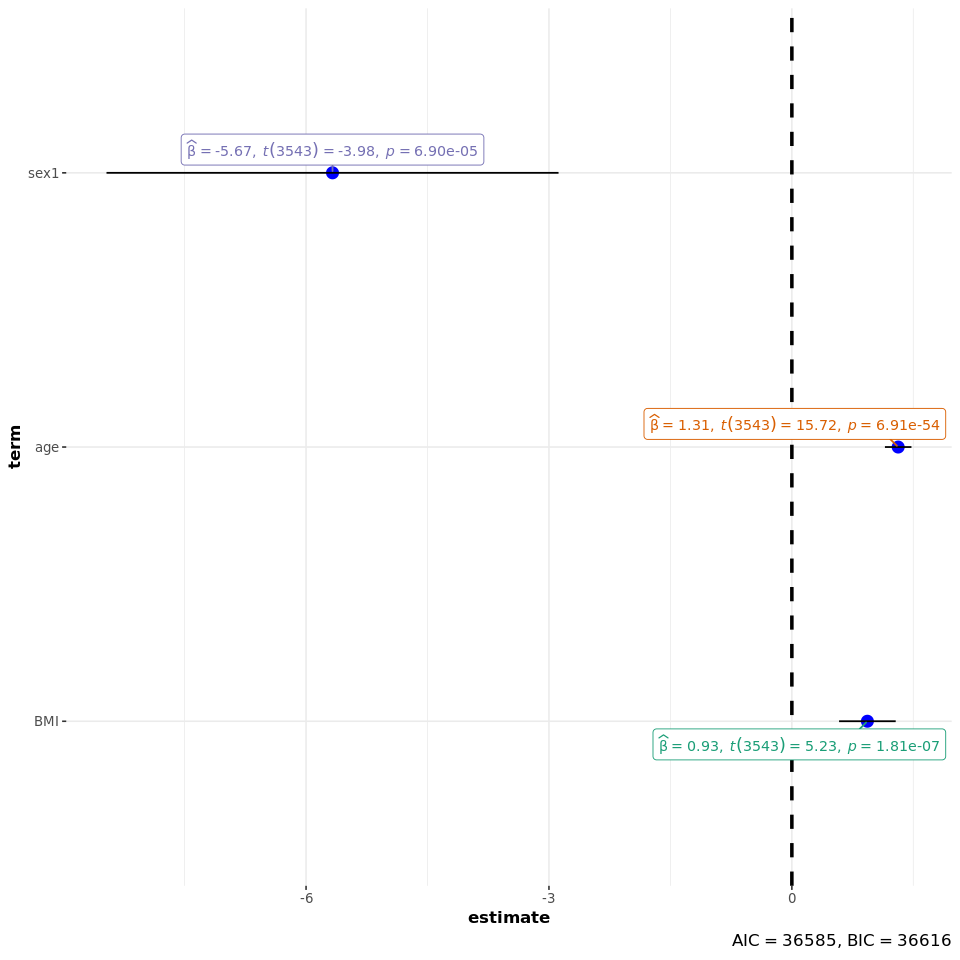

In [39]:
# solution

library(ggstatsplot)

# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

myfit_BMI_age_sex %>% ggcoefstats(exclude.intercept = T)

### Part 3

Create a diagnostic plot for the `myfit_bmi_age_sex` model using `autoplot` from `ggfortify`
- Interpret the plot

In [40]:
library(ggfortify)

# start here

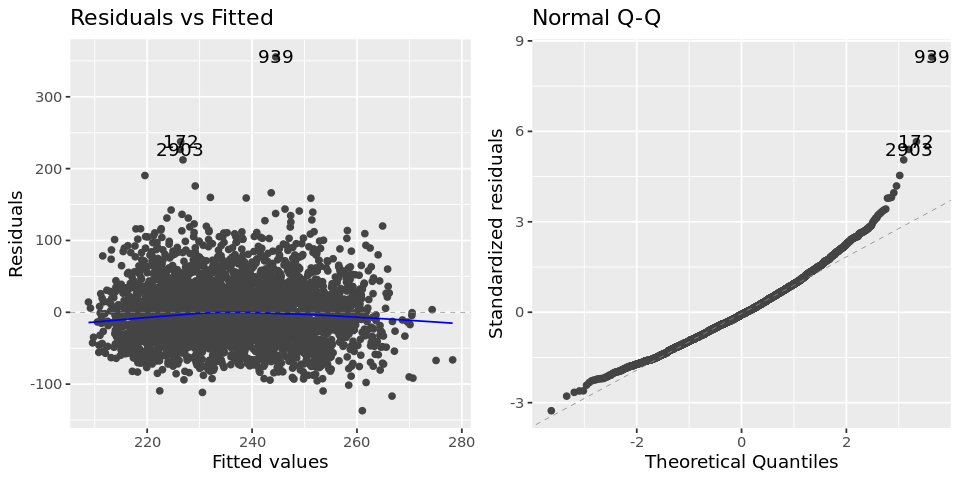

In [41]:
# solution

# set plot dimensions
options(repr.plot.width=8, repr.plot.height=4)

myfit_BMI_age_sex %>% autoplot(which=1:2)